#**Project 2 - Intro to Model Building & Gradient Descent**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##**Data Creation**

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """

  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

### Question 1 (2 points)

Use the function ```create_1d_data``` to create data with the following specifications:

1. ```num_examples = 70 ```
2. ```w = 2```
3. ```b = 1```
4. ```bound = 1```

Save the output to variables called ```X``` and ```Y```.



In [3]:
X, Y = create_1d_data(num_examples=70, w=2, b=1, bound=1)
X.shape, Y.shape

((70,), (70,))

## **Data Preprocessing**

### Question 2 (3 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [4]:
X = np.c_[np.ones(X.shape[0]), X]
X.shape

(70, 2)

### Question 3 (7 points)

Using the **train_test_split()** method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting ```test_size=0.2``` and ```random_state=1234```. All the other arguments of the method are set to default values. Name the resulting arrays ```X_train```, ```X_test```, ```Y_train```, ```Y_test```.
2. Print the shape of each array.

In [5]:
X_train, X_test = train_test_split(X,  test_size=0.2, random_state=1234)
Y_train, Y_test = train_test_split(Y,  test_size=0.2, random_state=1234)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((56, 2), (14, 2), (56,), (14,))

##**Modeling**

### Question 4 (4 points)

Based on how the data were generated, the following is a reasonable guess for a linear model:

$M_1(x) = 1+2x$ \

1. Using the matrix multiplicaton operation ```np.dot```, create a vector of predictions called ```M1_hat_train``` using the weights for $M_1$ and ```X_train```.
2. Print the shape of the predictions to verify that they match the shape of ```Y_train```.

In [6]:
M1_weights = np.array([1, 2])
M1_hat_train = np.dot(X_train, M1_weights)
M1_hat_train.shape

(56,)

### Question 5 (6 points)

In this question, you will complete code that executes the gradient descent algorithm for learning model parameters.

a. Please fill in all TODOs in the function below.

In [7]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 5).
    predictions = np.dot(inputs, W)

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diff ** 2)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = np.dot(diff, inputs) / m
    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

  return np.array(weights), np.array(losses)

b. What does each element in the gradient array represent? The gradient array is referring to the result of ```np.dot(diff, inputs) / m``` in the code above.




**Write answer here.**


he average rate of change of the loss function with respect to each weight

Run the cell below. It will execute the gradient descent algorithm using the training data. We are using a learning rate of 0.0002 and 5 epochs.

In [8]:
grad_desc_results = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=5)
grad_desc_results

(array([[1.        , 1.        ],
        [1.00709394, 1.33262886],
        [1.01183193, 1.55469157],
        [1.01499708, 1.7029404 ],
        [1.01711221, 1.80191116]]),
 array([1665.36666086,  742.41486626,  331.06572624,  147.73208293,
          66.02235863]))

### Question 6 (2 points)

Describe the ```grad_desc_results``` output, i.e. what values does each array contain?

**Write answer here.**

The first array in grad_desc_results contains the weight values at each epoch


The second array in grad_desc_results shows the loss values at each epoch:

In the plot below, we visualize the gradient descent results.

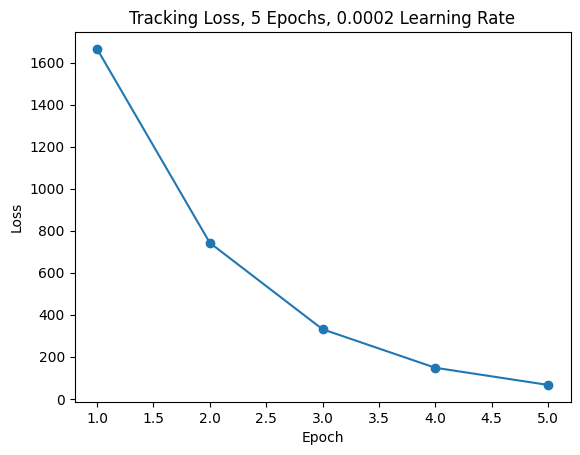

In [9]:
# plot loss versus epoch
epochs = np.array([1, 2, 3, 4, 5])
loss_vector = grad_desc_results[1]
plt.plot(epochs, loss_vector, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Tracking Loss, 5 Epochs, 0.0002 Learning Rate');

**Hyperparameter tuning** plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

In the plots below, we compare the loss at each epoch under the following scenarios:

1. learning_rate=.0002, num_epochs=5
2. learning_rate=.02, num_epochs=5
3. learning_rate=.0002, num_epochs=10

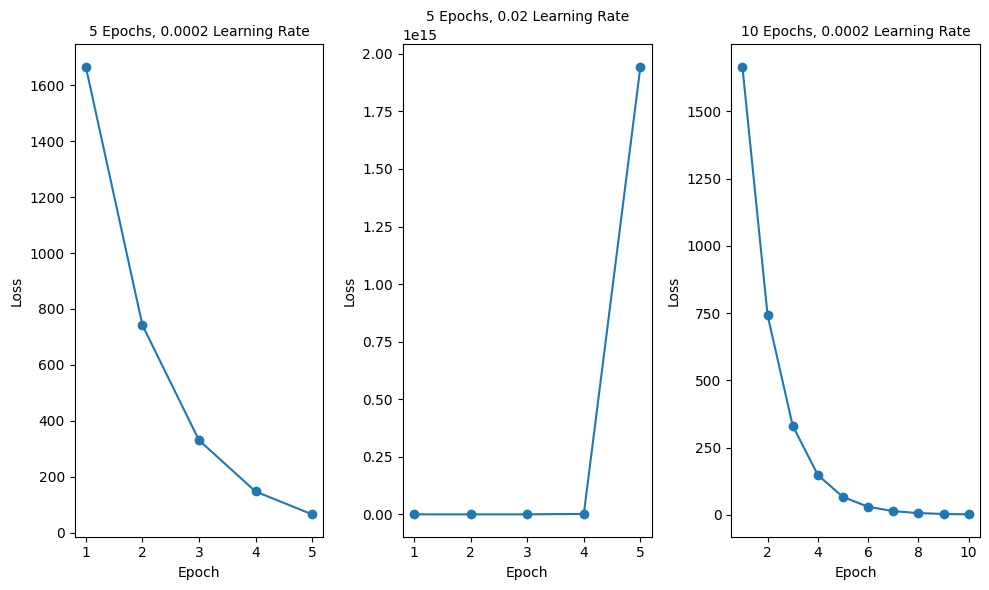

In [10]:
# run gradient descent using X_train, Y_train; learning rate = 0.02; 5 epochs
# store losses in an array
grad_desc_results_new_learning_rate = gradient_descent(X_train, Y_train, learning_rate=0.02, num_epochs=5)
loss_vector_new_learning_rate = grad_desc_results_new_learning_rate[1]

# run gradient descent using X_train, Y_train; learning rate = 0.0002; 10 epochs
# store epochs and losses in new arrays
grad_desc_results_new_epoch = gradient_descent(X_train, Y_train, learning_rate=0.0002, num_epochs=10)
epochs_updated = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
loss_vector_new_epoch = grad_desc_results_new_epoch[1]

# plot loss versus epoch in all scenarios under consideration
fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(10, 6))

ax[0].plot(epochs, loss_vector, marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('5 Epochs, 0.0002 Learning Rate').set_size(10)

ax[1].plot(epochs, loss_vector_new_learning_rate, marker='o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('5 Epochs, 0.02 Learning Rate').set_size(10)

ax[2].plot(epochs_updated, loss_vector_new_epoch, marker='o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].set_title('10 Epochs, 0.0002 Learning Rate').set_size(10);

In [11]:
# print loss at last epoch in each scenario
print('5 Epochs, 0.0002 Learning Rate')
print('Loss at Last Epoch: ', grad_desc_results[1][4])
print()

print('5 Epochs, 0.02 Learning Rate')
print('Loss at Last Epoch: ', grad_desc_results_new_learning_rate[1][4])
print()

print('10 Epochs, 0.0002 Learning Rate')
print('Loss at Last Epoch: ', grad_desc_results_new_epoch[1][9])

5 Epochs, 0.0002 Learning Rate
Loss at Last Epoch:  66.0223586320446

5 Epochs, 0.02 Learning Rate
Loss at Last Epoch:  1943544404976517.2

10 Epochs, 0.0002 Learning Rate
Loss at Last Epoch:  1.479786682981072


###Question 7 (4 points)

Using the plots and last epoch losses above, justify your answers to the following questions:

1. Do you think it would be beneficial to extend the model training in Question 5 by increasing the learning rate to 0.02? Assume 5 epochs are used.

2. Restoring to the previous learning rate of 0.0002, would you  consider extending the model training in Question 5 by increasing the number of epochs to 10?

**Write answer here.**

1) answer for one, no it is not beneficial to extend the model traning by increasing the learning rate to 0.02 as we have seen we have higher loss which outweights the benefit

2) I would consider it depending on the dataset it might me needed when we have less data i guess so we have less loss but on bigger dataset i think it would be bit insificent 

### Question 8 (3 points)

Which of the three hyperparameter combinations performs best?

Using the optimal hyperparameter combination, extract the improved model weights from the last epoch.

*Hint:* You will need to index into either ```grad_desc_results```, ```grad_desc_results_new_learning_rate```, or ```grad_desc_results_new_epoch``` to extract the weights.

Save the weights array to a variable called ```M2_weights```.

In [12]:
M2_weights =  grad_desc_results_new_epoch[0][9]
M2_weights

array([1.02081727, 1.97432553])

##**Evaluation and Generalization**

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

###Question 9 (4 points)
Compute the MSE metric on the training dataset for models $M_1$ and $M_2$.

*Hint:* You can use the **mean_squared_error()** method available in sklearn.metrics.

In [13]:
# first, compute predictions for model 2
M2_hat_train = np.dot(X_train, M2_weights)

M1_mse = mean_squared_error(Y_train, M1_hat_train)
print(M1_mse)

M2_mse = mean_squared_error(Y_train, M2_hat_train)
print(M2_mse)

0.3280557752885262
1.479786682981072


Now, let's define $M_3(x)$ to be the model whose weights come from the analytical solution to least-squares regression.

Recall, the analytical solution is characterized by the following weights:

$$ \hat \beta = (X^T X)^{-1}X^T Y $$

In [14]:
M3_weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
M3_weights

array([1.14837761, 1.99797911])

In [21]:
M3_hat_train = np.dot(X_train, M3_weights)
M3_mse = mean_squared_error(Y_train, M3_hat_train)
print('M3 MSE: ', M3_mse)

M3 MSE:  0.3204807624921627


### Question 10 (2 points)

Why are $M_3$'s weights not identical to $M_1$'s?

**Write answer here.**


The weights of 𝑀3 are not identical to 𝑀1
because they were likely trained under different conditions, such as different data splits, initialization, or hyperparameters.
​
  

### Question 11 (2 points)

Why does $M_3$ have a lower MSE on the training data than $M_1$?

**Write answer here.**


Because of different weights that were given to them for Training 

### Question 12 (2 points)

When dealing with convex loss functions such as the mean squared error that take on a single minimum value, gradient descent should converge to the analytical solution.

In other words, the model parameters for $M_2$ and $M_3$ should be identical.

Provide at least one reason as to why the $M_2$ and $M_3$ weights are not exactly aligned.

**Write answer here.**



The weights for 𝑀2 and 𝑀3
​ aren't exactly the same because things like different starting points or tiny differences in how the model learned can lead to small changes, even though both models try to reach the same goal.

### Question 13 (2 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability? Explain.

In [16]:
# compute predictions for models 1, 2, and 3 on test data
M1_hat_test = np.dot(X_test, M1_weights)
M2_hat_test = np.dot(X_test, M2_weights)
M3_hat_test = np.dot(X_test, M3_weights)

# compute test MSE for models 1, 2, and 3
M1_mse_test = mean_squared_error(Y_test, M1_hat_test)
M2_mse_test = mean_squared_error(Y_test, M2_hat_test)
M3_mse_test = mean_squared_error(Y_test, M3_hat_test)

#print test MSE for models 1, 2, and 3
print('M1 Test MSE: ', M1_mse_test)
print('M2 Test MSE: ', M2_mse_test)
print('M3 Test MSE: ', M3_mse_test)

M1 Test MSE:  0.2908006971666422
M2 Test MSE:  1.066053488198779
M3 Test MSE:  0.3103880362660164


**Write answer here.**

M1 Demonstrates the best genrelaztion ability.

The model with the lowest test error or the smallest gap between training and test error demonstrates better generalization ability, as it performs well on new, unseen data.and M1 has the lowest 